# How did Wilkie Collins Influence on Arthur Conan Doyle?

## Taeho Hwang

14 August 2022

Introduction to Computational Literary Analysis

Department of Digital Humanities, University of California, Berkeley

Instructor: Jonathan Reeve

In [41]:
import requests
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.stem import WordNetLemmatizer
import re
nltk.download('vader_lexicon')
import networkx
from itertools import combinations
import matplotlib.pyplot as plt
!conda install networkx

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/hwangyun/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Solving environment: done

# All requested packages already installed.



## 1. Introduction

Wiki Collins' Moonstone is the first English detective novel. Therefore, it influenced many writers in future generations. I compared directly with Arthur Conan Doyle's debut work in the Sherlock Holmes series, the most famous author of later generations, and examines how Moonstone influenced it through natural language processing. 

The Moonstone (1868) by Wilkie Collins is a 19th-century British epistolary novel. It is an early example of the modern detective novel, and established many of the ground rules of the modern genre. The story was serialised in Charles Dickens’s magazine All the Year Round. Collins adapted The Moonstone for the stage in 1877. (Wikipedia)

A Study in Scarlet is a 1887 detective novel by British writer Arthur Conan Doyle. The story marks the first appearance of Sherlock Holmes and Dr. Watson, who would become the most famous detective duo in literature. The book's title derives from a speech given by Holmes, a consulting detective, to his friend and chronicler Watson on the nature of his work, in which he describes the story's murder investigation as his "study in scarlet": "There's the scarlet thread of murder running through the colourless skein of life, and our duty is to unravel it, and isolate it, and expose every inch of it."(Wikipedia)

## 2. Approach

We use three methods to compare these two novels.

1. Sentiment Analysis Graph
2. LDA Topic Modeling
3. Social Network Graph

Using the above three tools, each novel is cut by 200 sentences and the changes are observed in chronological order to analyze which parts of the two novels are similar. I chose these three tools because I thought they were the most effective tools that didn't overlap when analyzing novels in chronological order.

### 2.1. Preprocessing Methods

Prior to full-scale novel analysis, data is preprocessed. The novel data was obtained in the form of a text file from Project Gutenberg, which is releasing a free, non-copyright classic novel. First of all, the names of the characters in each novel were summarized in advance and replaced with one. And all the sentences were changed to English for case-insensitive analysis. After that, all the letters except English, numbers, quotes, and punctuation were removed.

In [46]:
#Novels Data
url = 'https://www.gutenberg.org/cache/epub/244/pg244.txt'
r = requests.get(url)
moonstone = open("/Users/hwangyun/Desktop/course-computational-literary-analysis/Texts/moonstone.md", "r").read()
aStudyinScarlet = r.text

#Novels Characters
moonstoneCharacters = {
    "rachel": {"rachel", "rachel verinder"},
    "verinder": {"julia", "lady verinder", "lady"},
    "herncastle": {"colonel", "colonel herncastle"},
    "betteredge": {"gabriel", "betteredge", "gabriel betteredge"},
    "penelope": {"penelope", "penelope betteredge", "daugter"},
    "rosanna": {"spearman", "rosanna spearman"},
    "clack": {"drusilla", "drusilla clack"},
    "franklin": {"blake", "franklin blake"},
    "godfrey" : {"ablewhite", "godfrey ablewhite"},
    "ezra": {"jennings", "ezra jennings"},
    "indian": {"indian jugglers", "jugglers"},
    "candy": {"candy", "doctor", "Dr Candy"},
    "bruff": {"mr bruff"},
    "murthwaite": {"mr murthwaite"},
    "cuff": {"sergeant", "cuff", "sergeant cuff"},
    "seegrave": {"seegrave", "superintendent", "superintendent seegrave"},
    "gooseberyy": {"octavius guy", "octavius", "gooseberry"}
}


scarletCharacters = {
    "holmes": {"sherlock holmes", "sherlock"},
    "watson": {"john watson"},
    "jefferson": {"hope", "jefferson hope"},
    "gregson": {"tobias", "tobias gregson"},
    "lestrade": {"lestrade"},
    "ferrier": {"john ferrier"},
    "lucy": {"lucy ferrier"},
    "drebber": {"enoch", "enoch drebber"},
    "stangerson": {"joseph", "joseph stangerson"},
    "brigham": {"brigham young"},
    "rance": {"john rance"},
    "charpentier": {"arthur", "charpentier", "arthur charpentier"},
    "lrregulars": {"street lrregulars", "lrregulars", "baker", "baker street lrregulars"}
}

# Preprocess function

# Changing characters's name by pre-defined name.
def swithCharactersName(characters, text):
    for key, value in characters.items():
        for v in value:
            text = text.replace(v, key)
    return text

# Removing the characters without English, Numbers, Punctuation, etc...
def cleanText(string):
    string = string.lower()
    new_string = re.sub(r'[^a-zA-Z0-9 \'\",.;]'," ",string)
    new_string = re.sub(r'-'," ",new_string)
    return new_string

# Splitting the novel data by pre-defined sentences
def splitStoryBy(String, length=200):
    sent_token = nltk.sent_tokenize(String)
    sent_tokenList = list()
    tempList = []
    cnt = 0
    for sent in sent_token:
        if cnt < length:
            tempList.append(sent)
            cnt += 1
        else:
            cnt = 0
            sent_tokenList.append(tempList)
            tempList = []
    return sent_tokenList

## 3. Analysis Results
### 3.1. Sentiment Analysis Graph

Through emotional analysis, I decided to look at the overall flow of the novel. Through nltk.sentokenize, the novel was separated by sentence, and through vader Sentiment Intensity Analyzer for each sentence, the polarity score for each sentence was obtained and the sentiment was obtained. Positive sentiments are given a plus, negative sentiments are given a minus, and neutral sentiments are given a zero. Because I want to see the change in emotions bigger, I made the change bigger by giving 2 for 0.5 or more and 1 for less.

In [47]:
#processing the sentiment scale
def detScore(num): 
    if num < -0.5: return -2
    elif num >= -0.5 and num < 0:  return -1
    elif num == 0.0: return 0
    elif num > 0 and num <= 0.5: return 1
    else: return 2

We have to focus on the part where sentiments change rapidly. As a result of the analysis, it was confirmed that a twist occurred when sentiments changed from negative to positive.
For example, it shown on the arrow in Moonstone was the first time Blake found out that he had stolen diamonds with opium, and the second section was when Able White was dead and found to be the culprit. Likewise, the section marked with a study in Scarlet is when it is revealed that the criminal is a horseman. In this way, we can observe that there is a reversal in the section with a large emotional variable.

<img src="./forberkeley/forberkeley.004.jpeg" width="500"/>

It may seem that the two graphs are fluctuating differently, but it is not because the moonstone is four times longer overall, so it appears that the scale is different. It can be seen as the location of the twist as follows. A study in Scarlet is divided into the first half of the story and the second half of the story. So I analyzed only the story part. It can be seen that both novels have a twist at the end of the story in common. And because the graph fluctuates a lot overall, you can see that there are many twists in the story as a whole. It can be a big shock to readers who read detective novels by building up little by little and then having a shock to readers who read mystery novels. The shock comes as a bigger fun for readers. The longer the build-up, the more shocking the twist will be as the previously believed facts are denied.

In [48]:
#making the sentiment chart
def getSentiChart(novel):
    cleanedSentences = nltk.sent_tokenize(novel)
    cleanedNovel = [cleanText(s) for s in cleanedSentences]
    df = pd.DataFrame(cleanedSentences, columns=["sentence"])
    df.insert(1, "score", 0)
    for idx, sent in enumerate(cleanedSentences):
        df['score'].iloc[idx] = sia.polarity_scores(sent)['compound']
    df['score'].apply(detScore)
    df['predict'] = df.score.apply(detScore)
    df["cumScore"] = df['predict'].cumsum()
    df["cumScore"].plot(kind="line")

/var/folders/ng/cnt43s1x4_g7_y466h2k54gr0000gn/T/ipykernel_1556/40749581.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['score'].iloc[idx] = sia.polarity_scores(sent)['compound']


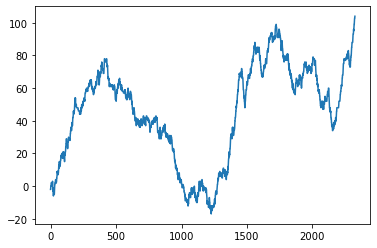

In [49]:
sia = SentimentIntensityAnalyzer()
getSentiChart(aStudyinScarlet)

/var/folders/ng/cnt43s1x4_g7_y466h2k54gr0000gn/T/ipykernel_1556/40749581.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['score'].iloc[idx] = sia.polarity_scores(sent)['compound']


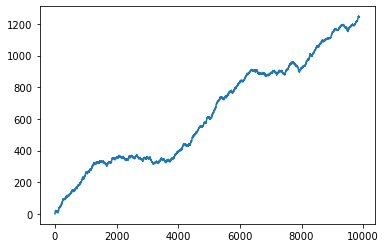

In [50]:
getSentiChart(moonstone)

### 3.2 LDA topic modeling.

By topic modeling each novel, I examine the similarity between the two novels by looking at important keywords for each novel. A lot of additional preprocessing has been done to LDA topic modeling. Since it is a keyword selection task, I removed Stopwords and removed words with a length of less than 3. I removed all the words except the parts adjectives, verbs, and nouns. And I lemmatize for the original form of the words was restored. Additionally, the novel was divided into 200 sentences to extract the topic in chronological order. The topic is set to be eight per split stories.

In [51]:
def makePosTagging(tokenizedString):
    tempList = []
    postList = []
    posText = nltk.pos_tag(tokenizedString)
    for pos in posText:
        if "N" in pos[1] or "V" in pos[1] or "J" in pos[1]:
            tempList.append(pos)
            #print(pos[0])
    return tempList

def removeStopWords(tokenedString):
    stop_words = stopwords.words('english')
    stop_words.append("chapter")
    stop_words.append("ii")
    newList = [word for word in tokenedString if word[0] not in (stop_words)]
    return newList

def removeLessThanThree(tokendString):
    tokenized_doc = [word for word in tokendString if len(word[0]) > 3]
    return tokenized_doc

from nltk.stem import WordNetLemmatizer

def doLemmatize(tokenedString):
    lemmatizer = WordNetLemmatizer()
    newList = []
    for word, pos in tokenedString:
        if "N" in pos:
            p = 'n'
        elif "V" in pos:
            p = 'v'
        elif "J" in pos:
            p = 'a'
        #print(word, p, lemmatizer.lemmatize(word, pos=p))
        newList.append(lemmatizer.lemmatize(word, pos=p))
    return newList

def detokenizing(preprocessText):
    t = ' '.join(preprocessText)
    return t

def get_topics(components, feature_names, n=10):
    for idx, topic in enumerate(components):
        print("Topic %d:" % (idx+1), [(feature_names[i]) for i in topic.argsort()[:-n - 1:-1]])
        
def preprocessingForLDA(splittedMoonstone):
    loweredMoonstone = [s.lower() for s in splittedMoonstone]
    tokenizedMoonstone = [nltk.word_tokenize(s) for s in loweredMoonstone]
    posRemovingMoonstone = [makePosTagging(s) for s in tokenizedMoonstone]
    
    removedStopwordsMoonstone = [removeStopWords(s) for s in posRemovingMoonstone]

    preprocessedMoonstone = [removeLessThanThree(s) for s in removedStopwordsMoonstone]

    stemmingMoonstone = [doLemmatize(s) for s in preprocessedMoonstone]
    #print(stemmingMoonstone)
    completeMoonstone = [detokenizing(s) for s in stemmingMoonstone]
    return completeMoonstone

In [52]:
def splitStoryBy(String, length=200):
    sent_token = nltk.sent_tokenize(String)
    sent_tokenList = list()
    tempList = []
    cnt = 0
    for sent in sent_token:
        if cnt < length:
            tempList.append(sent)
            cnt += 1
        else:
            cnt = 0
            sent_tokenList.append(tempList)
            tempList = []
    return sent_tokenList

In [53]:
cleanTextmoonstone= cleanText(moonstone)
cleanTextmoonstone = swithCharactersName(moonstoneCharacters, cleanTextmoonstone)
cleanaStudyinScarlet= cleanText(aStudyinScarlet)
cleanaStudyinScarlet = swithCharactersName(scarletCharacters, cleanaStudyinScarlet)
splittedMoonstone = splitStoryBy(cleanTextmoonstone, length=200)
splittedScarlet = splitStoryBy(cleanaStudyinScarlet, length=200)

MoonstoneForLDA = [preprocessingForLDA(s) for s in splittedMoonstone]
ScarletForLDA = [preprocessingForLDA(s) for s in splittedScarlet]

Now, let's look at the keywords by time through topic modeling for the Moonstone.

In [54]:
for s in MoonstoneForLDA:
    #print(s)
    vectorizer = TfidfVectorizer(stop_words='english', max_features= 1000)
    X = vectorizer.fit_transform(s)
    lda_model = LatentDirichletAllocation(n_components=8,learning_method='online',max_iter=1)
    lda_top = lda_model.fit_transform(X)
    terms = vectorizer.get_feature_names()
    get_topics(lda_model.components_,terms)
    print()
    print("-" * 100)


/Users/hwangyun/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Topic 1: ['contrary', 'example', 'favour', 'franklin', 'answer', 'weak', 'disgrace', 'pensioned', 'good', 'dead']
Topic 2: ['clover', 'know', 'little', 'expect', 'fail', 'lord', 'girl', 'start', 'tell', 'doubt']
Topic 3: ['life', 'mistress', 'year', 'woman', 'ask', 'miss', 'moonstone', 'fight', 'good', 'accord']
Topic 4: ['verinder', 'course', 'robinson', 'crusoe', 'reason', 'couple', 'seventh', 'late', 'warning', 'say']
Topic 5: ['selina', 'wife', 'free', 'goby', 'come', 'bride', 'assault', 'time', 'board', 'service']
Topic 6: ['story', 'cheap', 'law', 'meantime', 'herncastle', 'john', 'look', 'verinder', 'concern', 'point']
Topic 7: ['john', 'verinder', 'say', 'betteredge', 'service', 'pension', 'true', 'dozen', 'discovered', 'cottage']
Topic 8: ['declare', 'duty', 'mistress', 'motif', 'write', 'best', 'look', 'somebody', 'generation', 'honour']

----------------------------------------------------------------------------------------------------
Topic 1: ['say', 'wrong', 'place', 'hi

In the same way, A study in scarlet also conducted topic modeling.

In [55]:
for s in ScarletForLDA:
    #print(s)
    vectorizer = TfidfVectorizer(stop_words='english', max_features= 1000)
    X = vectorizer.fit_transform(s)
    lda_model = LatentDirichletAllocation(n_components=8,learning_method='online',max_iter=1)
    lda_top = lda_model.fit_transform(X)
    terms = vectorizer.get_feature_names()
    get_topics(lda_model.components_,terms)
    print()
    print("-" * 100)


Topic 1: ['holmes', 'room', 'chemical', 'say', 'bring', 'delighted', 'friend', 'played', 'mean', 'curiosity']
Topic 2: ['ask', 'piquant', 'fellow', 'time', 'live', 'place', 'term', 'little', 'bad', 'brown']
Topic 3: ['knotty', 'science', 'paper', 'look', 'deduction', 'learning', 'dump', 'settle', 'remarkable', 'open']
Topic 4: ['know', 'examination', 'study', 'medicine', 'hand', 'walk', 'laugh', 'cross', 'remark', 'rub']
Topic 5: ['say', 'room', 'wager', 'news', 'inspect', 'depend', 'police', 'player', 'jezail', 'answer']
Topic 6: ['answer', 'shortcoming', 'afghanistan', 'objectless', 'year', 'taller', 'mark', 'spoken', 'smile', 'prominence']
Topic 7: ['right', 'noon', 'blood', 'stain', 'principal', 'vice', 'test', 'present', 'hotel', 'follow']
Topic 8: ['good', 'murmur', 'sulky', 'think', 'expression', 'companion', 'lefevre', 'speak', 'hoemoglobin', 'acid']

----------------------------------------------------------------------------------------------------
Topic 1: ['answer', 'deduce

There were some common features.

### 3.2.1 Creating a mysterious atmosphere with religious and supernatural keywords.

Moonstone included Indian-related stories in an epilogue, explaining the background to the diamond. It introduced the idea of being sacred to Indians and the curse related to the diamond. Wilkie Collins tried to create a mysterious atmosphere in the novel's events through these religious keywords. Likewise, Mormonism appears in scarlet research, creating a mysterious atmosphere throughout the story. In addition, it is said that later detective stories include such religious and supernatural keywords.

<img src="./forberkeley/forberkeley.005.jpeg" width="500"/>

### 3.2.2 Leaving a clue to the crime scene.

Both novels unfold the story by leaving clues at the crime scene. In the case of The Moonstone, keywords such as 'nightgowns' and 'stain', 'smear' from painting are hints to the site. Likewise, scarlet letters leave 'blood' and 'rings' on the scene to give hints to the story. When writers lead stories, novels are limited in volume, so putting direct clues inside crime scenes will be advantageous for writers to lead stories. They sometimes give out bad clues, which they call McGuffin. It's expressed as if there's a meaning, but there's actually no meaningless. The crime scene is not just a clue, but also a MacGuffins.

<img src="./forberkeley/forberkeley.006.jpeg" width="500"/>


## 3.3 Social Network Graph

In the novel, I tried to draw a relationship between characters over time and analyzed it. If the sentence was divided into paragraphs and two characters appeared together in one paragraph, the person was judged to be related. The person who appeared at the same time was made into a concurrence matrix. The closer the distance on the graph, the more it actually appears together, and the deeper the relationship can be seen. I was able to observe and discover various similarities. When forming a social network, I did not accumulate the characters who appeared earlier, but classified them by a certain section to draw a new picture of their appearance. And that's because I don't want to look at social networks throughout the story, but I want to look at the relationship between the characters in a particular section, in a particular event.


In [56]:
def makeGraph(splitted, Characters):
    #print(charPairs)
    for cleanedParas in splitted:
        temp = " ".join(cleanedParas)
        chars = [c for c in Characters.keys() if c in temp]
        charPairs = list(combinations(chars, 2))
        charPairs = {c:0 for c in charPairs}

        for para in cleanedParas:
                for charPair in charPairs:
                    if charPair[0] in para and charPair[1] in para:
                        charPairs[charPair] += 1
        graph = networkx.Graph()
        charSet = set()

        for charPair in charPairs:
            if charPairs[charPair] > 0:
                if charPair[0] not in charSet:
                    graph.add_node(charPair[0])
                    charSet.add(charPair[0])

                if charPair[1] not in charSet:
                    graph.add_node(charPair[1])
                    charSet.add(charPair[1])

        for pair, weight in charPairs.items():
            if weight > 0:

                graph.add_edge(pair[0], pair[1], weight = weight)
        plt.figure(figsize=(5,5))

        networkx.draw_networkx(graph) 

/var/folders/ng/cnt43s1x4_g7_y466h2k54gr0000gn/T/ipykernel_1556/795357056.py:30: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(5,5))


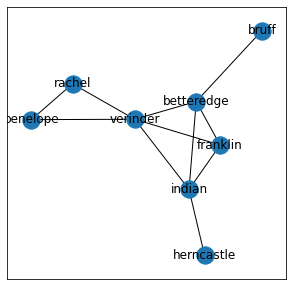

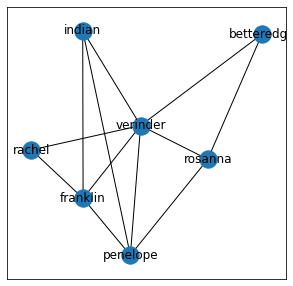

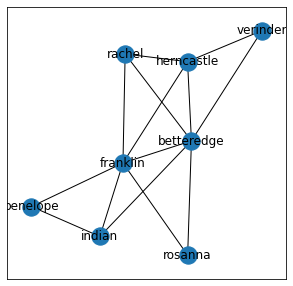

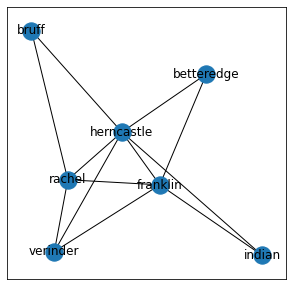

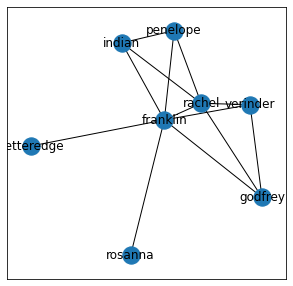

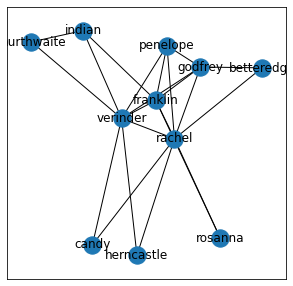

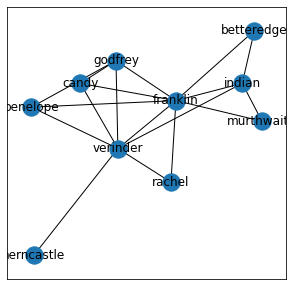

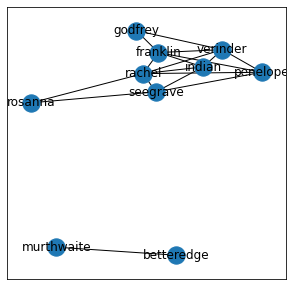

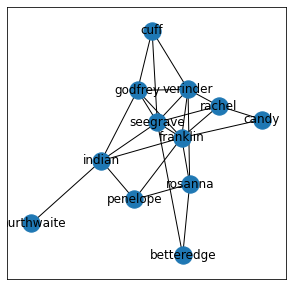

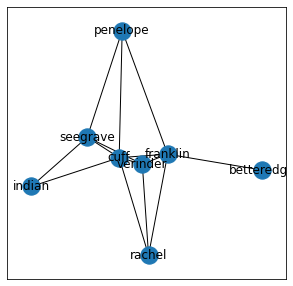

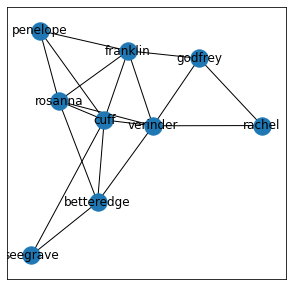

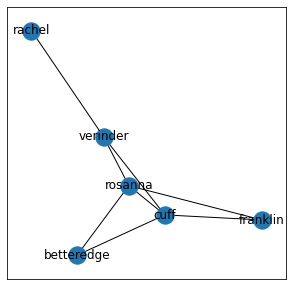

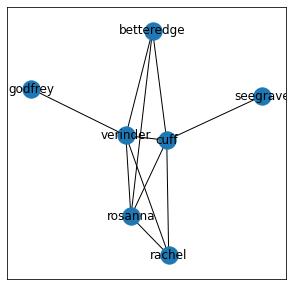

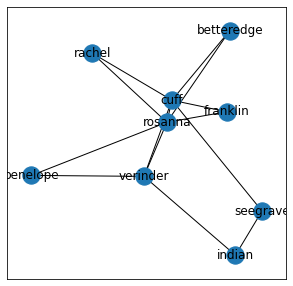

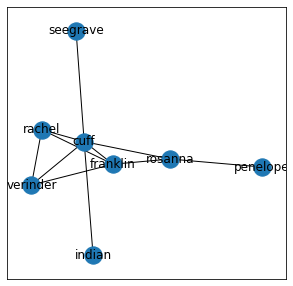

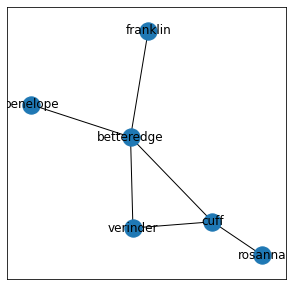

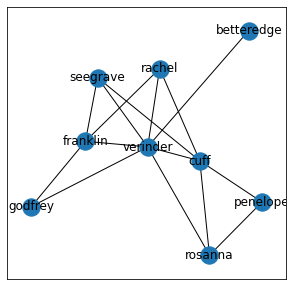

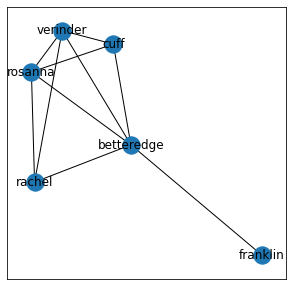

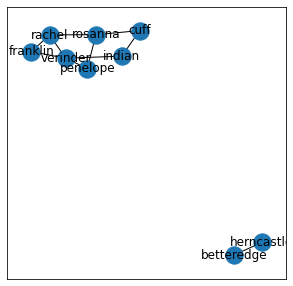

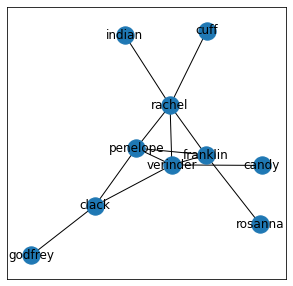

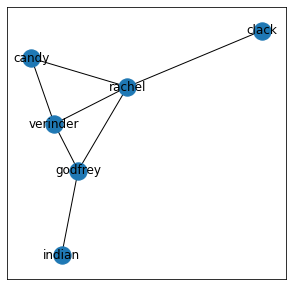

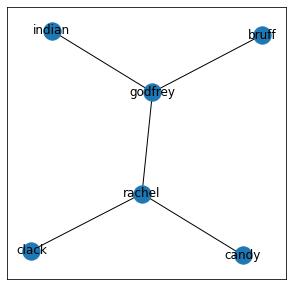

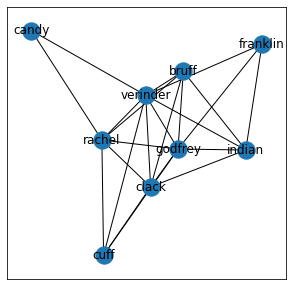

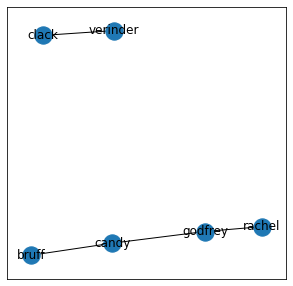

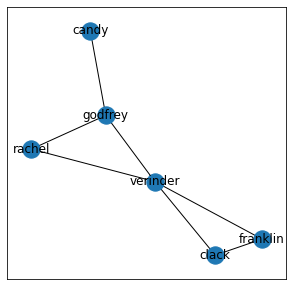

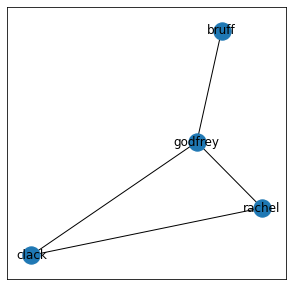

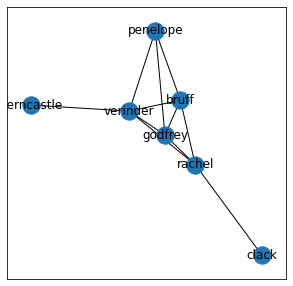

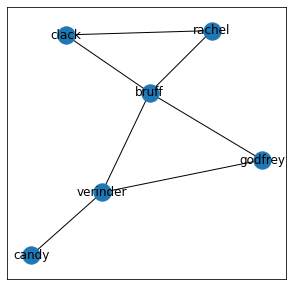

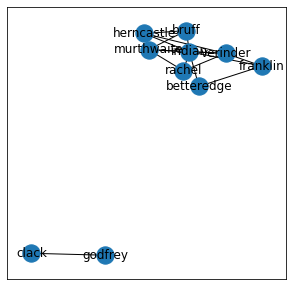

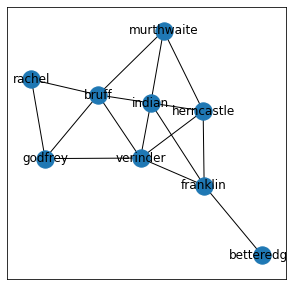

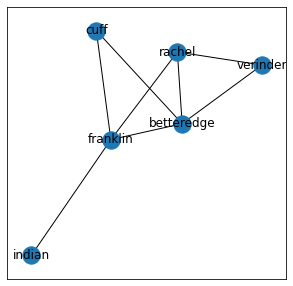

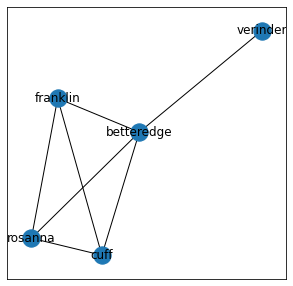

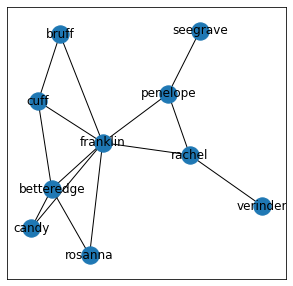

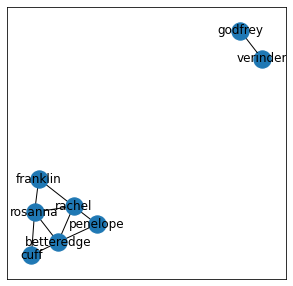

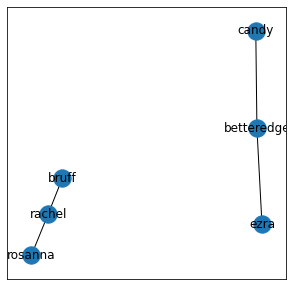

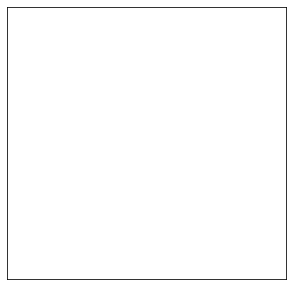

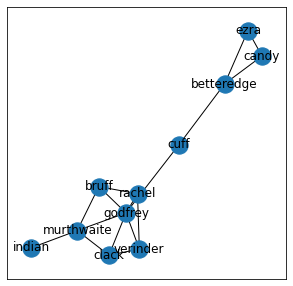

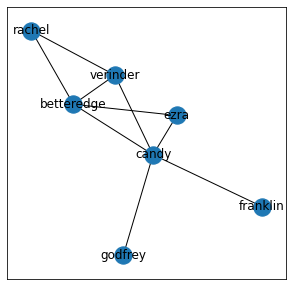

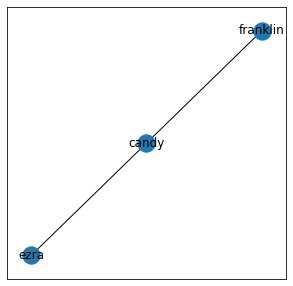

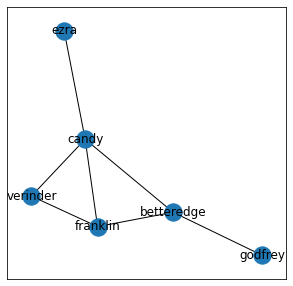

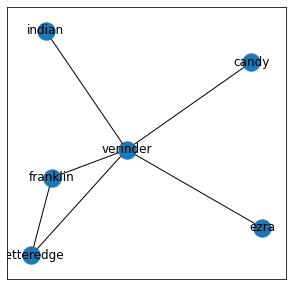

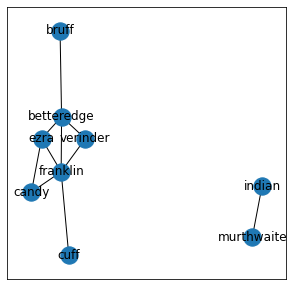

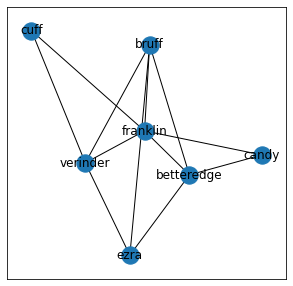

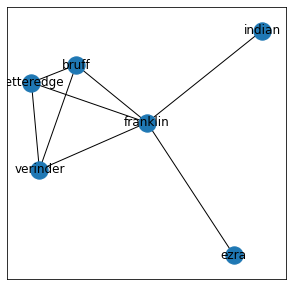

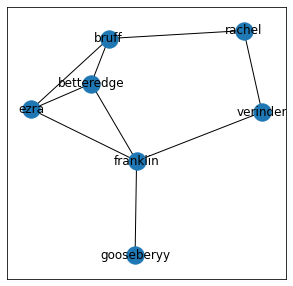

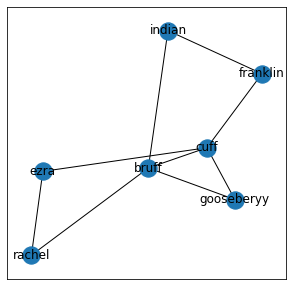

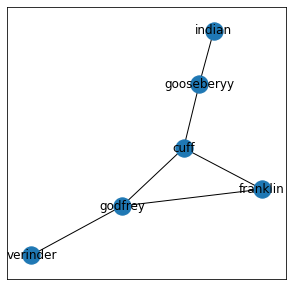

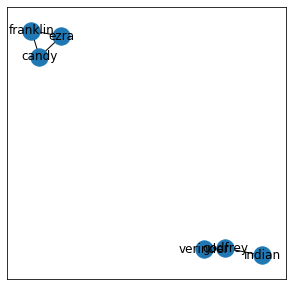

In [57]:
makeGraph(splittedMoonstone, moonstoneCharacters)

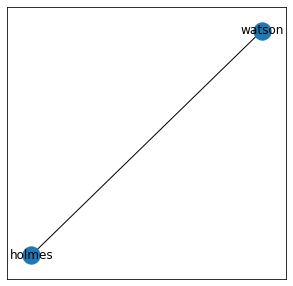

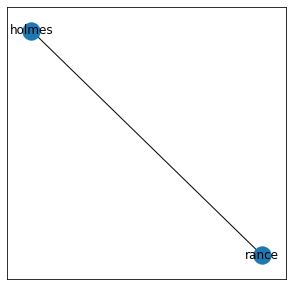

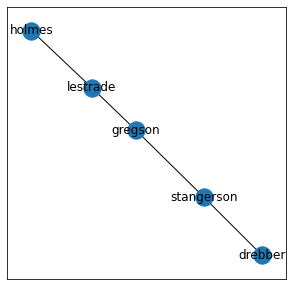

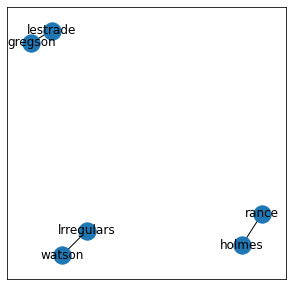

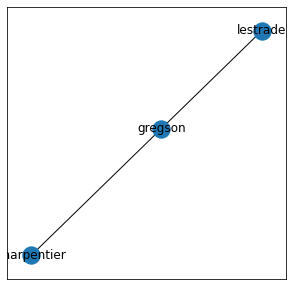

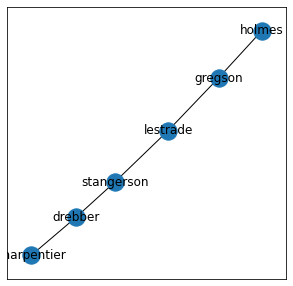

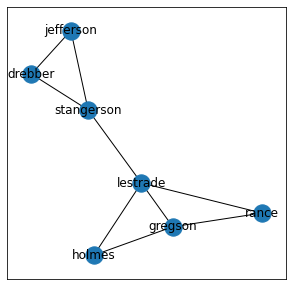

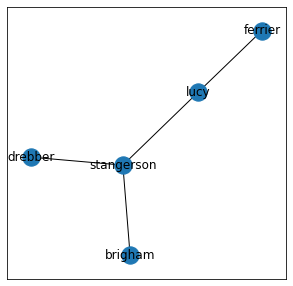

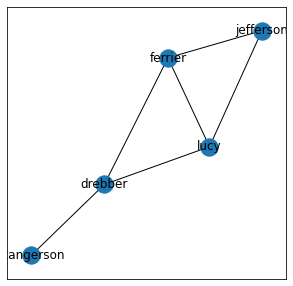

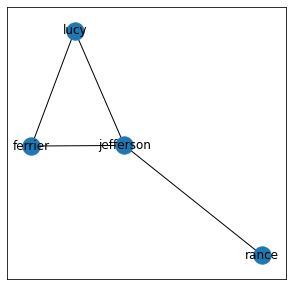

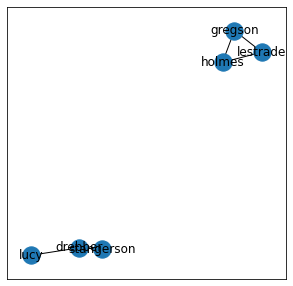

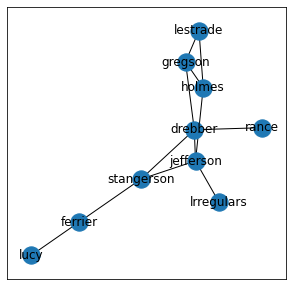

In [58]:
makeGraph(splittedScarlet, scarletCharacters)


### 3.3.1 The order in which the characters appear is very similar and the structure is similar.

There are differences in exactly what events appear, but the order in which they appear was very similar. And the overall structure of the story is very similar.

Usually, in daily life, the main character and the detective appear and crime occurs. Then the local police appear. The local police have trouble in solving the case. And a competent detective appears. After that, the victims or the involved people come out. The detective begins the investigation by asking and answering people's questions. Now there is the first suspect in the story. Usually, the suspect is not the criminal. After that, additional people involved come out and the criminal comes out.
The criminal is usually the least suspicious person. And it is a story in which the whole story of the case is revealed, and people who are in conflict and detectives successfully solve the case.

Taking Moonstone as an example, the main characters Franklin, Batteredge, Rachel, and people appear in their daily lives, and a diamond theft accident occurs. Subsequently, local police officer Seegrave appeared. After having a problem, a competent detective Cuff appears. Other suspects, such as Penelope, Rosanna, and Rachael, are suspected. But they are not criminals. Later, Rosanna died as a victim, followed by Candy, Ezra, and other criminals such as Able White. Able White is the least suspicious person.

<img src="./forberkeley/forberkeley.007.jpeg" width="500"/>

In the 'A Study in Scarlet', Sherlock Holmes and Watson appeared, and two local police officers appeared in their daily lives, and the problem was not solved. A competent detective, Sherlock Holmes, appears. And the police misunderstand the criminal as a Navy sergeant. But he's not the criminal. After that, someone else is sacrificed. The people involved come out, and the real criminal comes out and the case ends.

This is a very general structure that applies not only to novels, but also to detective movies and even animations. The structure was first created by Moonstone and later people were greatly influenced. These laws were later organized separately into rules and developed into a form of reference for constructing detective-related content.

<img src="./forberkeley/forberkeley.008.jpeg" width="500"/>

There are several other features besides this.

### 3.3.2 There is always a companion by the detective.

Seargent Cuff always carried Batterege to verify the case. Likewise, Dr. Holmes always accompanied Watson. As for this, I thought someone set up the detective's reasoning because they needed someone to see it like a reader from a third party's point of view. From a detective's point of view, the fun is halved because he knows all the detective's thoughts.

### 3.3.3 The incompetent local police appear.

Detective novels always feature incompetent local police officers. They always misunderstand events and pick up falsehoods.It's actually showing distrust of the police at the time. When the police were crushed by corruption and unable to trust the citizens, a hero called a detective appeared and helped them, which was reflected in the novel.

### 3.3.4 Boys play an important role in solving cases.

At Moonstone, Gooseberry looks for the criminal. Likewise, in A Study in Scarlet, Bakers Street Irregulars find the culprit. The reason why boys are important is because of the expectations they have on not only detectives but also growing boys at the time. It is reflected in the novel that new boys who grow up in a chaotic world think that they will change their world.


## 4. Conclusions

The similarities between the two novels were identified as follows. The two novels had many similarities. Moonstone, the first detective novel, influenced many detective stories in later generations. Similar genres call this part cliché. Similar genres flow similarly. These clichés can also be said to be evidence that the writers were influenced by each other. In modern times, many of these clichés are said to have been broken. It is a way to recognize and avoid cliché on purpose, rather than shine the reader's expectations. However, Cliché also gives readers fun to read. Readers rather like stories similar to those they have previously enjoyed reading. In the novel, it is up to writers to properly mix the cliché that readers might like and the fun of making it a little off the mark and giving a big twist.

## 5. References

wikipedia, The moosntone, https://en.wikipedia.org/wiki/The_Moonstone

Robert P. Ashley, 'Wilkie Collins and the Detective Story', Nineteenth-Century Fiction Vol. 6, No. 1 (Jun., 1951), pp. 47-60 (14 pages). Accessed 11. Aug.

Ian Duncan, 'The Moonstone,' the Victorian novel, and imperialist panic' Modern Language Quarterly(Vol. 55, Issue 3). Accessed 10 Aug. 2022.

Elisabeth Rose Gruner, 'Family Secrets and the Mysteries of The Moonstone', Victorian Literature and Culture 21 (1993), 127-145. Accessed 12 Aug. 2022.